# Lasso Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [2]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

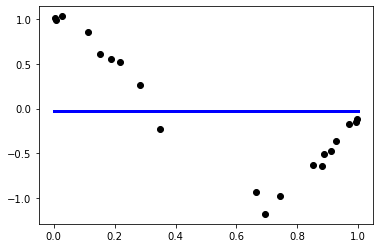

In [3]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


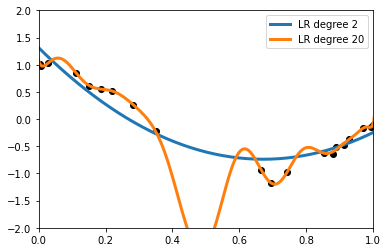

In [4]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Lasso Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

LR degree 20               
Lasso degree 20, alpha 1   
Lasso degree 20, alpha 10e4
Lasso degree 20, alpha 1e-4


/home/kuba/anaconda3/envs/foai/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016326570120576214, tolerance: 0.0009522394112962496
  model = cd_fast.enet_coordinate_descent(


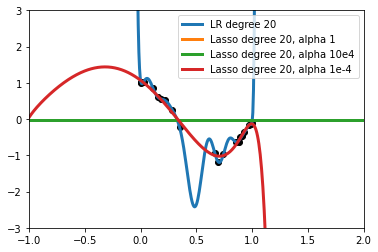

In [5]:
models = []
predicts = []
names = []
models.append(('LR degree 20               ', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())))
models.append(('Lasso degree 20, alpha 1   ', make_pipeline(PolynomialFeatures(20), Lasso(alpha=1))))
models.append(('Lasso degree 20, alpha 10e4', make_pipeline(PolynomialFeatures(20), Lasso(alpha=10e4))))
models.append(('Lasso degree 20, alpha 1e-4', make_pipeline(PolynomialFeatures(20), Lasso(alpha=1e-4))))


x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i], linewidth=3, label=names[i])
    plt.xlim((-1, 2))
    plt.ylim((-3, 3))
plt.legend()    
plt.show()    

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

{'lasso__alpha': 0.001, 'polynomialfeatures__degree': 4}


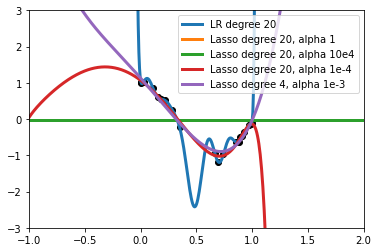

In [6]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=make_pipeline(PolynomialFeatures(), Lasso()),
                    param_grid={'polynomialfeatures__degree': [i + 1 for i in range(10)], 'lasso__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1]},
                    cv=5, refit=True, n_jobs=-1)
grid.fit(x, y)
print(grid.best_params_)
models.append(grid.best_estimator_)
names.append("Lasso degree 4, alpha 1e-3")
predicts.append(grid.best_estimator_.predict(x_plot))

plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i], linewidth=3, label=names[i])
    plt.xlim((-1, 2))
    plt.ylim((-3, 3))
plt.legend()    
plt.show() 

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [7]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=make_pipeline(PolynomialFeatures(), Lasso()),
                    param_grid={'polynomialfeatures__degree': [i + 1 for i in range(10)], 'lasso__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1]},
                    cv=5, refit=True, n_jobs=-1)
grid.fit(X, y)
print(grid.best_params_)

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 3}


/home/kuba/anaconda3/envs/foai/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.574718653360474, tolerance: 0.5417148749999998
  model = cd_fast.enet_coordinate_descent(
